# Installing Hub

In [ ]:
!pip3 install hub --quiet
import os 
os.kill(os.getpid(), 9) 

     |████████████████████████████████| 255 kB 31.7 MB/s 
     |████████████████████████████████| 256 kB 62.9 MB/s 
     |████████████████████████████████| 1.8 MB 39.8 MB/s 
     |████████████████████████████████| 131 kB 62.5 MB/s 
     |████████████████████████████████| 3.0 MB 39.5 MB/s 
     |████████████████████████████████| 105 kB 32.2 MB/s 
     |████████████████████████████████| 545 kB 44.7 MB/s 
     |████████████████████████████████| 81 kB 4.6 MB/s 
     |████████████████████████████████| 152 kB 46.4 MB/s 
     |████████████████████████████████| 80 kB 8.4 MB/s 
     |████████████████████████████████| 55 kB 2.6 MB/s 
     |████████████████████████████████| 5.8 MB 9.5 MB/s 
     |████████████████████████████████| 109 kB 11.7 MB/s 
     |████████████████████████████████| 75 kB 1.4 MB/s 
     |████████████████████████████████| 79 kB 2.8 MB/s 
     |████████████████████████████████| 8.5 MB 42.4 MB/s 
     |████████████████████████████████| 127 kB 45.3 MB/s 
     |███████████████████

# Download raw dataset

In [12]:
from IPython.display import clear_output
from google.colab import files

In [8]:
#@title Login to Kaggle
files.upload() 
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
print('Kaggle Json Uploaded')

Saving kaggle.json to kaggle.json
Kaggle Json Uploaded


In [ ]:
# Download dataset here
!kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge
!mkdir kaggle/
!mv *.csv *.gz *.zip kaggle/

# Unzip files
!unzip kaggle/icml_face_data.csv.zip
!tar -xvzf kaggle/fer2013.tar.gz
!unzip kaggle/test.csv.zip 
!unzip kaggle/train.csv.zip

clear_output()

In [13]:
import hub
from PIL import Image 
import numpy as np 
import os
import pandas as pd
from matplotlib import pyplot as plt

In [16]:
#@title Login to ActiveLoop

!activeloop login -u username -p password
!activeloop reporting --off

Successfully logged in to Activeloop.


# Creating dataset on hub

**Activeloop API** : https://docs.activeloop.ai/api-basics

In [ ]:
!rm -rf FER*

In [17]:
filename_path = 'hub://activeloop/FER2013'
hub.delete(filename_path+'-Train')
hub.delete(filename_path+'-Public-Test')
hub.delete(filename_path+'-Private-Test')

This dataset can be visualized at https://app.activeloop.ai/activeloop/FER2013-Train.
This dataset can be visualized at https://app.activeloop.ai/activeloop/FER2013-Public-Test.
This dataset can be visualized at https://app.activeloop.ai/activeloop/FER2013-Private-Test.


In [18]:
filename_path = 'hub://activeloop/fer2013'
train_ds = hub.dataset(filename_path+'-train')
public_test_ds = hub.dataset(filename_path+'-public-test')
private_test_ds = hub.dataset(filename_path+'-private-test')

Your Hub dataset has been successfully created!
The dataset is private so make sure you are logged in!
This dataset can be visualized at https://app.activeloop.ai/activeloop/fer2013-train.
Your Hub dataset has been successfully created!
The dataset is private so make sure you are logged in!
This dataset can be visualized at https://app.activeloop.ai/activeloop/fer2013-public-test.
Your Hub dataset has been successfully created!
The dataset is private so make sure you are logged in!
This dataset can be visualized at https://app.activeloop.ai/activeloop/fer2013-private-test.


In [19]:
data = pd.read_csv('icml_face_data.csv')
print(f"Columns : {data.columns}")
data.groupby(by=' Usage').count()

Columns : Index(['emotion', ' Usage', ' pixels'], dtype='object')


,emotion,pixels
Usage,,
PrivateTest,3589,3589
PublicTest,3589,3589
Training,28709,28709


In [20]:
# 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

In [21]:
with train_ds:
    train_ds.info.update(source='https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/',
                   title='Challenges in Representation Learning: Facial Expression Recognition Challenge',
                   classes='0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral')
    
    # Training data
    train_ds.create_tensor('images', htype='image', sample_compression=None)
    train_ds.create_tensor('labels', htype = 'class_label', class_names = class_names)

with public_test_ds:
    public_test_ds.info.update(source='https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/',
                title='Challenges in Representation Learning: Facial Expression Recognition Challenge',
                classes='0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral')

    # Testing data
    public_test_ds.create_tensor('images', htype='image', sample_compression=None)
    public_test_ds.create_tensor('labels', htype = 'class_label', class_names = class_names)

with private_test_ds:
    private_test_ds.info.update(source='https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/',
                title='Challenges in Representation Learning: Facial Expression Recognition Challenge',
                classes='0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral')

    # Testing data
    private_test_ds.create_tensor('images', htype='image', sample_compression=None)
    private_test_ds.create_tensor('labels', htype = 'class_label', class_names = class_names)

In [22]:
def convert_string_2_matrix(string):
    array = [int(data) for data in string.split(' ')]
    matrix = np.array(array, dtype='uint8').reshape((48, 48))
    return matrix

In [23]:
for group_name, df_group in data.groupby(by=' Usage'):
    if group_name == 'Training':
        with train_ds:
            for index, row in df_group.iterrows():
                matrix = convert_string_2_matrix(row[' pixels'])
                train_ds['images'].append(matrix)
                train_ds['labels'].append(np.uint32(row['emotion']))

    if group_name == 'PublicTest':
        with public_test_ds:
            for index, row in df_group.iterrows():
                matrix = convert_string_2_matrix(row[' pixels'])
                public_test_ds['images'].append(matrix)
                public_test_ds['labels'].append(np.uint32(row['emotion']))

    if group_name == 'PrivateTest':
        with private_test_ds:
            for index, row in df_group.iterrows():
                matrix = convert_string_2_matrix(row[' pixels'])
                private_test_ds['images'].append(matrix)
                private_test_ds['labels'].append(np.uint32(row['emotion']))

Train Label -> 2


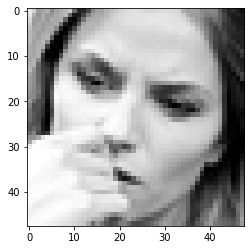

In [24]:
index = 2
image = train_ds['images'][index].numpy()
label = train_ds['labels'][index].numpy()[0]
print(f'Train Label -> {label}')
plt.imshow(image, cmap='gray')
plt.show()

Public Test Label -> 4


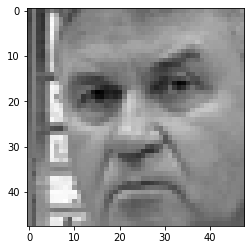

In [25]:
index = 2
image = public_test_ds['images'][index].numpy()
label = public_test_ds['labels'][index].numpy()[0]
print(f'Public Test Label -> {label}')
plt.imshow(image, cmap='gray')
plt.show()

Private Test Label -> 6


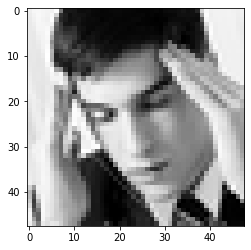

In [26]:
index = 2
image = private_test_ds['images'][index].numpy()
label = private_test_ds['labels'][index].numpy()[0]
print(f'Private Test Label -> {label}')
plt.imshow(image, cmap='gray')
plt.show()